# AuTextification

## Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
from transformers import BertTokenizer, BertModel
import torch

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.stem import SnowballStemmer
from collections import Counter


import warnings

# Suppress FutureWarning related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning)

## Data

In [2]:
root = './data/competition_2024/data_lang_identified/'
train_en = pd.read_csv(root+'train_en.csv')
train_es = pd.read_csv(root+'train_es.csv')
train_pt = pd.read_csv(root+'train_pt.csv')
train_ca = pd.read_csv(root+'train_ca.csv')
train_eu = pd.read_csv(root+'train_eu.csv')
train_gl = pd.read_csv(root+'train_gl.csv')

# train = pd.read_csv(root+'train.csv')

In [ ]:
# train = pd.read_csv('C:/Users/34686/3CD - 23_24/PROY III/autextification/data_24/subtask1.csv').drop(columns='Unnamed: 0')

# Domains

In [3]:
from nltk.stem import SnowballStemmer

# Initialize Snowball stemmer for English
stemmer_en = SnowballStemmer("english")
stemmer_es = SnowballStemmer("spanish")
stemmer_pt = SnowballStemmer("portuguese")



# Define keywords for each domain in English with only the root of each word
k_en = {
    'technology': [stemmer_en.stem(word) for word in ['technology', 'informatics', 'software', 'artificial intelligence', 'computing']],
    'health': [stemmer_en.stem(word) for word in ['health', 'medical', 'diseases', 'treatment', 'medicine']],
    'legal': [stemmer_en.stem(word) for word in ['law', 'legal', 'legal', 'lawyer', 'rights']],
    'politics': [stemmer_en.stem(word) for word in ['politics', 'government', 'elections', 'party', 'democracy']],
    'philosophy': [stemmer_en.stem(word) for word in ['philosophy', 'metaphysics', 'ethics', 'epistemology', 'logic']],
    'language': [stemmer_en.stem(word) for word in ['language', 'language', 'grammar', 'vocabulary', 'linguistics']],
    'art': [stemmer_en.stem(word) for word in ['art', 'painting', 'music', 'sculpture', 'dance']],
    'biology': [stemmer_en.stem(word) for word in ['biology', 'biological', 'organism', 'cell', 'genetics']],
    'education': [stemmer_en.stem(word) for word in ['education', 'school', 'student', 'teacher', 'learning']],
    'geography': [stemmer_en.stem(word) for word in ['geography', 'continent', 'ocean', 'region', 'landscape']],
    'economy': [stemmer_en.stem(word) for word in ['economy', 'finance', 'market', 'trade', 'business']],
    'religion': [stemmer_en.stem(word) for word in ['religion', 'belief', 'faith', 'church', 'spirituality']]
}

# Define keywords for each domain in English
keywords = {
    'technology': ['technology', 'informatics', 'software', 'artificial intelligence', 'computing'],
    'health': ['health', 'medical', 'diseases', 'treatment', 'medicine'],
    'legal': ['law', 'legal', 'legal', 'lawyer', 'rights'],
    'politics': ['politics', 'government', 'elections', 'party', 'democracy'],
    'philosophy': ['philosophy', 'metaphysics', 'ethics', 'epistemology', 'logic'],
    'language': ['language', 'language', 'grammar', 'vocabulary', 'linguistics'],
    'art': ['art', 'painting', 'music', 'sculpture', 'dance'],
    'biology': ['biology', 'biological', 'organism', 'cell', 'genetics'],
    'education': ['education', 'school', 'student', 'teacher', 'learning'],
    'geography': ['geography', 'continent', 'ocean', 'region', 'landscape'],
    'economy': ['economy', 'finance', 'market', 'trade', 'business'],
    'religion': ['religion', 'belief', 'faith', 'church', 'spirituality']
}

k_es = {
    'tecnología': [stemmer_es.stem(word) for word in ['tecnología', 'informática', 'software', 'inteligencia artificial', 'computación']],
    'salud': [stemmer_es.stem(word) for word in ['salud', 'médico', 'enfermedades', 'tratamiento', 'medicina']],
    'legal': [stemmer_es.stem(word) for word in ['ley', 'legal', 'abogado', 'derechos']],
    'política': [stemmer_es.stem(word) for word in ['política', 'gobierno', 'elecciones', 'partido', 'democracia']],
    'filosofía': [stemmer_es.stem(word) for word in ['filosofía', 'metafísica', 'ética', 'epistemología', 'lógica']],
    'lenguaje': [stemmer_es.stem(word) for word in ['lenguaje', 'idioma', 'gramática', 'vocabulario', 'lingüística']],
    'arte': [stemmer_es.stem(word) for word in ['arte', 'pintura', 'música', 'escultura', 'baile']],
    'biología': [stemmer_es.stem(word) for word in ['biología', 'biológico', 'organismo', 'célula', 'genética']],
    'educación': [stemmer_es.stem(word) for word in ['educación', 'escuela', 'estudiante', 'profesor', 'aprendizaje']],
    'geografía': [stemmer_es.stem(word) for word in ['geografía', 'continente', 'océano', 'región', 'paisaje']],
    'economía': [stemmer_es.stem(word) for word in ['economía', 'finanzas', 'mercado', 'comercio', 'negocio']],
    'religión': [stemmer_es.stem(word) for word in ['religión', 'creencia', 'fe', 'iglesia', 'espiritualidad']]
}

k_pt = {
    'tecnologia': [stemmer_pt.stem(word) for word in ['tecnologia', 'informática', 'software', 'inteligência artificial', 'computação']],
    'saúde': [stemmer_pt.stem(word) for word in ['saúde', 'médico', 'doenças', 'tratamento', 'medicina']],
    'legal': [stemmer_pt.stem(word) for word in ['lei', 'legal', 'advogado', 'direitos']],
    'política': [stemmer_pt.stem(word) for word in ['política', 'governo', 'eleições', 'partido', 'democracia']],
    'filosofia': [stemmer_pt.stem(word) for word in ['filosofia', 'metafísica', 'ética', 'epistemologia', 'lógica']],
    'língua': [stemmer_pt.stem(word) for word in ['língua', 'idioma', 'gramática', 'vocabulário', 'linguística']],
    'arte': [stemmer_pt.stem(word) for word in ['arte', 'pintura', 'música', 'escultura', 'dança']],
    'biologia': [stemmer_pt.stem(word) for word in ['biologia', 'biológico', 'organismo', 'célula', 'genética']],
    'educação': [stemmer_pt.stem(word) for word in ['educação', 'escola', 'estudante', 'professor', 'aprendizagem']],
    'geografia': [stemmer_pt.stem(word) for word in ['geografia', 'continente', 'oceano', 'região', 'paisagem']],
    'economia': [stemmer_pt.stem(word) for word in ['economia', 'finanças', 'mercado', 'comércio', 'negócio']],
    'religião': [stemmer_pt.stem(word) for word in ['religião', 'crença', 'fé', 'igreja', 'espiritualidade']]
}


In [4]:

k_ca = {
    'tecnologia': ['tecnologia', 'informàtica', 'programari', 'intel·ligència artificial', 'computació'],
    'salut': ['salut', 'mèdic', 'malalties', 'tractament', 'medicina'],
    'legal': ['llei', 'legal', 'advocat', 'drets'],
    'política': ['política', 'govern', 'eleccions', 'partit', 'democràcia'],
    'filosofia': ['filosofia', 'metafísica', 'ètica', 'epistemologia', 'lògica'],
    'llengua': ['llengua', 'idioma', 'gramàtica', 'vocabulari', 'lingüística'],
    'art': ['art', 'pintura', 'música', 'escultura', 'dansa'],
    'biologia': ['biologia', 'biològic', 'organisme', 'cèl·lula', 'genètica'],
    'educació': ['educació', 'escola', 'estudiant', 'professor', 'aprenentatge'],
    'geografia': ['geografia', 'continent', 'oceà', 'regió', 'paisatge'],
    'economia': ['economia', 'finances', 'mercat', 'comerç', 'negoci'],
    'religió': ['religió', 'creença', 'fe', 'església', 'espiritualitat']
}

k_eu = {
    'teknologia': ['teknologia', 'informatika', 'software', 'artificial intelligenzia', 'konputazioa'],
    'osasuna': ['osasuna', 'medikuntza', 'gaixotasunak', 'tratamendua', 'medikuntza'],
    'legala': ['legea', 'legala', 'abokatua', 'eskubideak'],
    'politika': ['politika', 'gobiernoa', 'hauteskundeak', 'alderdia', 'demokrazia'],
    'filosofia': ['filosofia', 'metafisika', 'etika', 'epistemologia', 'logika'],
    'hizkuntza': ['hizkuntza', 'idioma', 'gramatika', 'hiztegia', 'linguistika'],
    'artea': ['artea', 'margolari', 'musika', 'eskultura', 'dantza'],
    'biologia': ['biologia', 'biologikoa', 'organismoa', 'zelaia', 'genetika'],
    'hezkuntza': ['hezkuntza', 'eskola', 'ikasle', 'irakasle', 'ikaskuntza'],
    'geografia': ['geografia', 'kontinentea', 'itsasoa', 'eremu', 'paisaia'],
    'ekonomia': ['ekonomia', 'finantzak', 'merkatua', 'komertzioa', 'negozioa'],
    'erlijioa': ['erlijioa', 'sinestea', 'fedea', 'eliza', 'espiritualtasuna']
}

k_gl = {
    'tecnoloxía': ['tecnoloxía', 'informática', 'software', 'intelixencia artificial', 'computación'],
    'saúde': ['saúde', 'médico', 'enfermidades', 'tratamento', 'medicina'],
    'legal': ['lei', 'legal', 'avogado', 'dereitos'],
    'política': ['política', 'goberno', 'eleccións', 'partido', 'democracia'],
    'filosofía': ['filosofía', 'metafísica', 'ética', 'epistemoloxía', 'lóxica'],
    'lingua': ['lingua', 'idioma', 'gramática', 'vocabulario', 'lingüística'],
    'arte': ['arte', 'pintura', 'música', 'escultura', 'baile'],
    'bioloxía': ['bioloxía', 'biolóxico', 'organismo', 'célula', 'xenética'],
    'educación': ['educación', 'escola', 'estudante', 'profesor', 'aprendizaxe'],
    'xeografía': ['xeografía', 'continente', 'océano', 'rexión', 'paisaxe'],
    'economía': ['economía', 'finanzas', 'mercado', 'comercio', 'negocio'],
    'relixión': ['religión', 'crenza', 'fe', 'igrexa', 'espiritualidade']
}



## Useful functions

In [7]:

def identify_domains(text, keywords=k_en, stemmer= None):
    """
    Identify the domain with the most occurrences of keywords in a given text.
    """
    if stemmer is not None:
    # Tokenize the text and stem the tokens
        tokens = [stemmer.stem(token) for token in text.lower().split()]
    else:
        tokens = [token for token in text.lower().split()]
    
    # Count occurrences of stemmed tokens in the text for each domain
    domain_counts = Counter()
    for domain, domain_keywords in keywords.items():
        domain_counts[domain] = sum(1 for keyword in domain_keywords if keyword in tokens)
    
    # Get the domain with the maximum count of keywords
    predicted_domain = domain_counts.most_common(1)[0][0]
    
    return predicted_domain


def domain_sampling(df, n):
    """
    Sample n rows of each domain from the DataFrame.

    Parameters:
    - df: DataFrame containing text data and corresponding labels.
    - n: Number of rows to sample for each domain.

    Returns:
    - sampled_df: DataFrame containing n rows of each domain.
    """
    # Dict where I'll put the sampled rows
    sampled_data = {}
    
    for domain in df['domain'].unique():
        sampled_data[domain] = df[df['domain'] == domain].sample(n, replace=True)
    
    sampled_df = pd.concat(sampled_data.values())
    sampled_df = sampled_df.sample(frac=1).reset_index(drop=True)
    
    return sampled_df


In [10]:
train_en['domain'] = train_en['text'].apply(identify_domains, keywords=k_en, stemmer=stemmer_en)

In [14]:
train_es['domain'] = train_es['text'].apply(identify_domains, keywords=k_es, stemmer=stemmer_es)

In [15]:
train_pt['domain'] = train_pt['text'].apply(identify_domains, keywords=k_pt, stemmer=stemmer_pt)

In [11]:
train_ca['domain'] = train_ca['text'].apply(identify_domains, keywords=k_ca)

In [12]:
train_eu['domain'] = train_eu['text'].apply(identify_domains, keywords=k_eu)

In [13]:
train_gl['domain'] = train_gl['text'].apply(identify_domains, keywords=k_gl)

## Some stats

In [58]:
def stats(df, language, n=None):
    print(f'---{language}---')
    print()
    print(df['domain'].value_counts())
    print()
    print(df['label'].value_counts())
    print()
    
    
    if n is None:
        n = min(df['domain'].value_counts())
    
    ifsampling = domain_sampling(df, n)
    print(f'---{language} if sampling ---')
#     print()
#     print(ifsampling['domain'].value_counts())
    print()
    print(ifsampling['label'].value_counts())
    return ifsampling
    

In [60]:
new_en = stats(train_en, 'English')

---English---

domain
technology    14651
politics       2069
legal          1936
art            1597
education      1480
health         1266
economy        1018
geography       556
biology         365
religion        355
language        317
philosophy       92
Name: count, dtype: int64

label
generated    13869
human        11833
Name: count, dtype: int64

---English if sampling ---

label
generated    631
human        473
Name: count, dtype: int64


In [61]:
new_es = stats(train_es, 'Spanish')

---Spanish---

domain
tecnología    11977
política       4273
salud          1111
educación      1047
legal          1003
geografía       801
arte            684
economía        480
religión        260
biología        225
lenguaje        143
filosofía       115
Name: count, dtype: int64

label
human        11672
generated    10447
Name: count, dtype: int64

---Spanish if sampling ---

label
generated    721
human        659
Name: count, dtype: int64


In [62]:
new_pt = stats(train_pt, 'Portuguese')

---Portuguese---

domain
tecnologia    10704
política       3797
saúde           924
educação        846
legal           845
geografia       699
arte            670
economia        439
religião        234
língua          214
filosofia        80
biologia         70
Name: count, dtype: int64

label
human        10022
generated     9500
Name: count, dtype: int64

---Portuguese if sampling ---

label
generated    430
human        410
Name: count, dtype: int64


In [63]:
new_ca = stats(train_ca, 'Catalan')

---Catalan---

domain
tecnologia    11259
política       1820
legal           606
geografia       555
art             510
salut           468
educació        269
economia        267
llengua         213
religió         117
filosofia        71
biologia         40
Name: count, dtype: int64

label
generated    9717
human        6478
Name: count, dtype: int64

---Catalan if sampling ---

label
generated    279
human        201
Name: count, dtype: int64


In [64]:
new_eu = stats(train_eu, 'Basque')

---Basque---

domain
teknologia    10798
artea           612
hezkuntza       445
ekonomia        357
hizkuntza       326
geografia       290
politika        149
legala          135
erlijioa        118
osasuna         106
filosofia        42
biologia         41
Name: count, dtype: int64

label
generated    8423
human        4996
Name: count, dtype: int64

---Basque if sampling ---

label
generated    294
human        198
Name: count, dtype: int64


In [65]:
new_gl = stats(train_gl, 'Galician')

---Galician---

domain
tecnoloxía    6799
política       965
arte           675
educación      462
lingua         445
xeografía      379
legal          365
economía       326
saúde          314
relixión       226
bioloxía        73
filosofía       66
Name: count, dtype: int64

label
generated    5924
human        5171
Name: count, dtype: int64

---Galician if sampling ---

label
human        409
generated    383
Name: count, dtype: int64


# Models: SVM - Text representation `Multilingual BERT`

**NOTE galician**

I tried using stemmer but there's no official stemmer for Galician. I tried with the Portuguese one but the results weren't so good. I also tried different ways of adding domain to a row (without the need of being anotators) and this works quite fine in comparation to the others. 

There is a BERT model trained with Galician texts called BERTINHO (dvilares/bertinho-gl-base-cased)


In [67]:
from transformers import BertTokenizer

# Crear una instancia de BertTokenizer
berTokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
from transformers import BertModel

# Cargar el modelo BERT pre-entrenado
bertModel = BertModel.from_pretrained('bert-base-multilingual-cased')


In [68]:
def get_bert_embeddings(text, tokenizer, model):
    """
    Function to obtain the BERT embedding from a text
    """
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :]
    return cls_embedding.numpy()



def train_cv_svm(df, n_splits=5, tokenizer = berTokenizer, model = bertModel):
    """
    function that receives a dataframe and trains a support vector machine
    classification mother using get_bert_embeddings
    
    it additionally uses a cross validation scheme to check results
    """
    
    # Getting word embeddings
    X_embeddings = [get_bert_embeddings(text, tokenizer, model) for text in df['text']]
    X_embeddings = [embedding.squeeze() for embedding in X_embeddings]
    
    # SVM model
    svm_model = SVC(kernel='linear')
    
    # Cross validation
    y_pred = cross_val_predict(svm_model, X_embeddings, df['label'], cv=n_splits)
    
    f1 = f1_score(df['label'], y_pred, average='weighted')
    print("F1 Score:", f1)
    
    cm = confusion_matrix(df['label'], y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Get confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['generated', 'human'], yticklabels=['generated', 'human'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return X_embeddings, svm_model, y_pred


F1 Score: 0.8876510374398726
Confusion Matrix:
[[570  61]
 [ 63 410]]


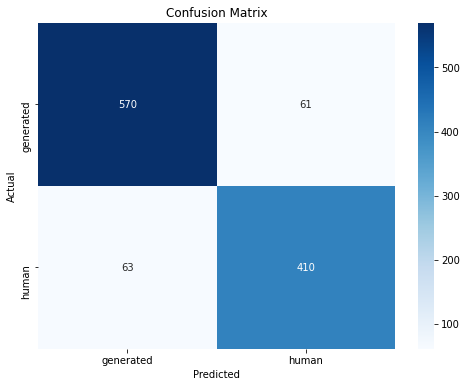

In [69]:
wem_en, svm_en, pred_en = train_cv_svm(new_en)

F1 Score: 0.8905832218571531
Confusion Matrix:
[[645  76]
 [ 75 584]]


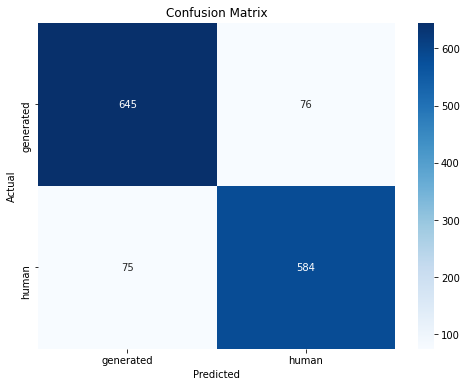

In [70]:
wem_es, svm_es, pred_es = train_cv_svm(new_es)

F1 Score: 0.9023499277352766
Confusion Matrix:
[[393  37]
 [ 45 365]]


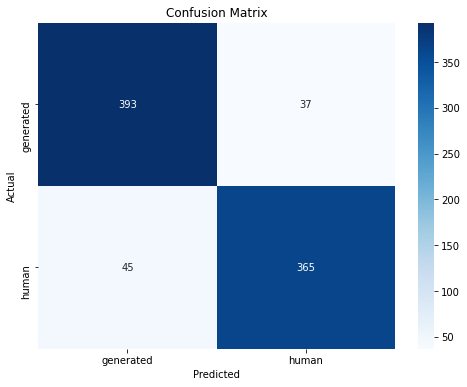

In [71]:
wem_pt, svm_pt, pred_pt = train_cv_svm(new_pt)

F1 Score: 0.8645356086527867
Confusion Matrix:
[[247  32]
 [ 33 168]]


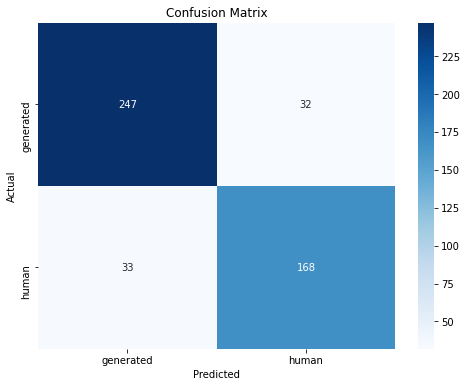

In [72]:
wem_ca, svm_ca, pred_ca = train_cv_svm(new_ca)

F1 Score: 0.9166319228041522
Confusion Matrix:
[[274  20]
 [ 21 177]]


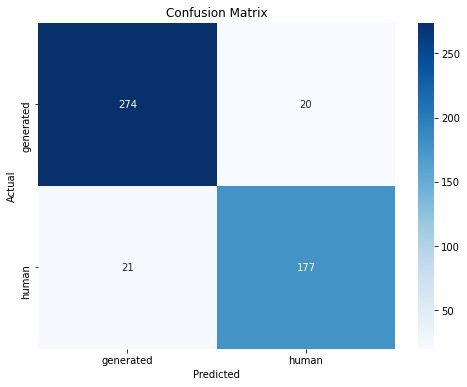

In [73]:
wem_eu, svm_eu, pred_eu = train_cv_svm(new_eu)

F1 Score: 0.8851055940396853
Confusion Matrix:
[[338  45]
 [ 46 363]]


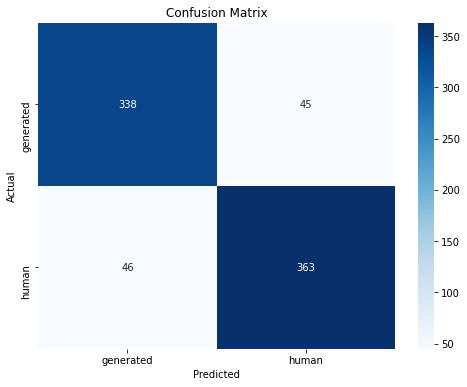

In [74]:
wem_gl, svm_gl, pred_gl = train_cv_svm (new_gl)

In [82]:
def train_test(corpus, test=0.2):
    x_train, x_test, y_train, y_test = train_test_split(corpus.loc[:'text'],
                                                       corpus['label'], test_size=test, random_state=42)
    print("Dimensions of Training subset")
    print(x_train.shape)
    print(x_test.shape)
    
    print("Dimensions of Testing subset")
    print(y_train.shape)
    print(y_test.shape)
    print()
          
    return x_train['text'], x_test['text'], y_train, y_test

In [83]:
x_train_en, x_test_en, y_train_en, y_test_en = train_test(new_en, 0.2)
x_train_es, x_test_es, y_train_es, y_test_es = train_test(new_es, 0.2)
x_train_ca, x_test_ca, y_train_ca, y_test_ca = train_test(new_ca, 0.2)
x_train_eu, x_test_eu, y_train_eu, y_test_eu = train_test(new_eu, 0.2)
x_train_gl, x_test_gl, y_train_gl, y_test_gl = train_test(new_gl, 0.2)
x_train_pt, x_test_pt, y_train_pt, y_test_pt = train_test(new_pt, 0.2)

Dimensions of Training subset
(883, 8)
(221, 8)
Dimensions of Testing subset
(883,)
(221,)

Dimensions of Training subset
(1104, 8)
(276, 8)
Dimensions of Testing subset
(1104,)
(276,)

Dimensions of Training subset
(384, 8)
(96, 8)
Dimensions of Testing subset
(384,)
(96,)

Dimensions of Training subset
(393, 8)
(99, 8)
Dimensions of Testing subset
(393,)
(99,)

Dimensions of Training subset
(633, 8)
(159, 8)
Dimensions of Testing subset
(633,)
(159,)

Dimensions of Training subset
(672, 8)
(168, 8)
Dimensions of Testing subset
(672,)
(168,)



In [103]:
def myshape(vec):
    print(len(vec), len(vec[0]))

In [105]:
myshape(wem_en)
myshape(wem_es)
myshape(wem_pt)
myshape(wem_ca)
myshape(wem_eu)
myshape(wem_gl)



1104 768
1380 768
840 768
480 768
492 768
792 768
